# 优达学城P3（安然公司邮件数据分析）

## 1 数据概况

### 1.1 载入数据

In [44]:
#!/usr/bin/python
# -*- coding=utf-8 -*-
import sys
import pickle

sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import pandas as pd
import matplotlib.pyplot as plt

with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

features = ['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus',
            'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options',
            'other', 'long_term_incentive', 'restricted_stock', 'director_fees', 'to_messages','email_address',
            'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

IOError: [Errno 2] No such file or directory: 'final_project_dataset.pkl'

### 1.2 观察空值
将原始数据的dict格式转化为dataframe格式，获取每个变量空值个数

In [2]:
data_df = pd.DataFrame(data_dict).T
data_df = data_df[features]
for f in features:
    if 'NaN' in data_df[f].unique():
        print 'There are %s null values in %s' % (str(data_df[f].value_counts()['NaN']), f)

There are 51 null values in salary
There are 107 null values in deferral_payments
There are 21 null values in total_payments
There are 142 null values in loan_advances
There are 64 null values in bonus
There are 128 null values in restricted_stock_deferred
There are 97 null values in deferred_income
There are 20 null values in total_stock_value
There are 51 null values in expenses
There are 44 null values in exercised_stock_options
There are 53 null values in other
There are 80 null values in long_term_incentive
There are 36 null values in restricted_stock
There are 129 null values in director_fees
There are 60 null values in to_messages
There are 35 null values in email_address
There are 60 null values in from_poi_to_this_person
There are 60 null values in from_messages
There are 60 null values in from_this_person_to_poi
There are 60 null values in shared_receipt_with_poi


loan_advances、restricted_stock_deferred、director_fees三个变量空值较多，可以忽略；email_address这个变量为字符型变量，无法进行计算，也可忽略。将其他变量的空值用0替换。

In [3]:
features = ['poi', 'salary', 'deferral_payments', 'total_payments', 'bonus', 'deferred_income', 'total_stock_value', 'expenses', 
            'exercised_stock_options','other', 'long_term_incentive', 'restricted_stock', 'to_messages',
            'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']
data_df=data_df[features]
data_df.replace({'NaN': 0}, inplace=True)

## 2 去除异常值

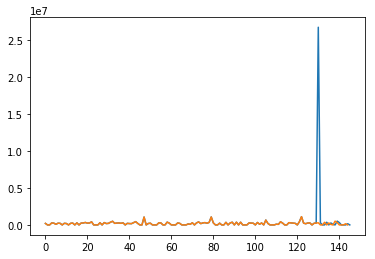

In [4]:
plt.plot(list(data_df['salary'].values))
data_df = data_df[data_df['salary'] < 2e7]
plt.plot(list(data_df['salary'].values))
plt.show()

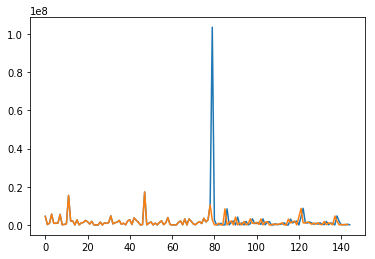

In [5]:
plt.plot(list(data_df['total_payments'].values))
data_df = data_df[data_df['total_payments'] < 1e8]
plt.plot(list(data_df['total_payments'].values))
plt.show()

变量分布

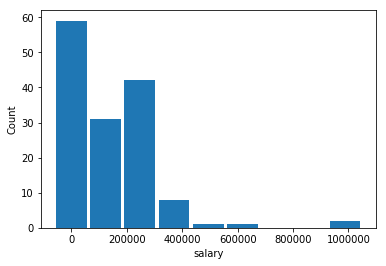

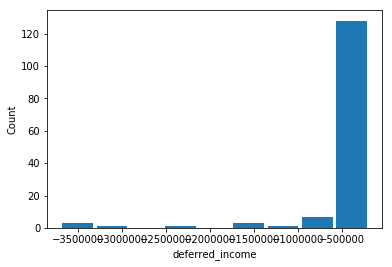

In [29]:
import numpy as np
import matplotlib.pyplot as plt
def make_hist(data,feature_name,bins):
    min_data=data[feature_name].values.min()
    max_data=data_df[feature_name].values.max()
    hist,bin_edges=np.histogram(data[feature_name].values,bins=np.linspace(min_data,max_data,bin_num))
    plt.bar(bin_edges[:-1],hist,width=float(max_data-min_data)/bins)
    plt.xlabel(feature_name)
    plt.ylabel('Count')
    plt.show()
make_hist(data_df,'salary',10)
make_hist(data_df,'deferred_income',10)

## 3 设计新特征

In [43]:
#print data_df.describe()
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
my_dataset=pd.DataFrame()
my_dataset['salary_scalered']=scaler.fit_transform(data_df['salary'])
my_dataset['total_payments_scalered']=scaler.fit_transform(data_df['total_payments'])
my_dataset['bonus_scalered']=scaler.fit_transform(data_df['bonus'])
my_dataset['deferred_income_scalered']=scaler.fit_transform(data_df['deferred_income'])

     salary_scalered  total_payments_scalered  bonus_scalered  \
0           0.181735                 0.259930        0.521875   
1           0.000000                 0.010576        0.000000   
2           0.000429                 0.053105        0.000000   
3           0.240360                 0.326581        0.150000   
4           0.215675                 0.047975        0.050000   
5           0.072727                 0.049856        0.000000   
6           0.208169                 0.056170        0.087500   
7           0.192574                 0.318888        0.656250   
8           0.000000                 0.005941        0.000000   
9           0.194898                 0.013243        0.000000   
10          0.169107                 0.035870        0.031250   
11          0.000000                 0.895885        0.000000   
12          0.192237                 0.118684        0.125000   
13          0.223662                 0.116785        0.106250   
14          0.000000     

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single fea

In [ ]:
model_features=['salary_scalered', 'deferral_payments', 'total_payments_scalered', 'bonus_scalered', 'deferred_income_scalered', 
                'total_stock_value', 'expenses', 'exercised_stock_options','other', 'long_term_incentive', 'restricted_stock',
                'to_messages','from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']
labels = data_df['poi'].values
features = data_df[model_features].values

## 4 机器学习

SVC

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pip=Pipeline(steps=[('pca',PCA()),('clf',SVC())])
param_grid={'pca__n_components':range(2,11),'clf__kernel':('linear','rbf'),'clf__C':[0.1,1,10]}
cv=StratifiedShuffleSplit(n_splits=3,test_size=0.3,random_state=0)
grid=GridSearchCV(pip,param_grid=param_grid,cv=cv)
grid.fit(features,labels)
print grid.best_params_,grid.best_score_

逻辑回归

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe=Pipeline(steps=[('pca',PCA()),('clf',LogisticRegression())])
param_grid=[{'pca__n_components':range(2,11),'clf__random_state':1}]
cv=StratifiedShuffleSplit(n_splits=3,test_size=0.3,random_state=0)
grid=GridSearchCV(pipe,param_grid=param_grid,cv=cv)
grid.fit(features,labels)
print grid.best_params_,grid.best_score_

GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

clf = GaussianNB()
pipe = Pipeline(steps=[('pca', PCA()), ('clf', clf)])
param_grid = {'pca__n_components': range(2, 11), 'clf__kernel': ('linear', 'rbf')}
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
grid = GridSearchCV(pipe, param_grid=param_grid, cv=cv)
grid.fit(features, labels)
print 'GaussianNB'
print grid.best_params_, grid.best_score_